In [1]:
import numpy as np 
import tensorflow as tf
import pandas as pd 
from matplotlib import pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import plot_model
import PIL

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dataset = pd.read_csv('gdrive/Shareddrives/FIT3163 - Group 6 Assignment/CNN/hmnist_28_28_RGB.csv')# pixel detail
metadata = pd.read_csv("gdrive/Shareddrives/FIT3163 - Group 6 Assignment/CNN/HAM10000_metadata.csv")

In [4]:
# 'label' is the result,drop first
image_data = dataset.drop(['label'], axis = 1)
image_data = np.array(image_data)
# the number of images,reshape
image_index = len(dataset.index)
images = image_data.reshape(-1, 28, 28,3)
image_label = metadata['dx']

In [26]:
dataset.shape[1]

2353

In [7]:
label_dict = {}
for i in range(len(dataset['label'])):
    if dataset['label'][i] in label_dict:
      pass
    else:
      label_dict[dataset['label'][i]] = image_label[i]
  

In [8]:
label_dict

{0: 'akiec', 1: 'bcc', 2: 'bkl', 3: 'df', 4: 'nv', 5: 'vasc', 6: 'mel'}

In [9]:
classes = {0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  
           1:('bcc' , ' basal cell carcinoma'), 
           2 :('bkl', 'benign keratosis-like lesions'), 
           3: ('df', 'dermatofibroma'),
           4: ('nv', ' melanocytic nevi'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           6: ('mel', 'melanoma')}

In [ ]:
# example 
# plt.figure(figsize = (25,25))
# for i in range(30) :
#     plt.subplot(3,10,i+1)
#     plt.imshow(images[i])
#     plt.title(label_dict[dataset['label'][i]])

In [10]:
data_wt_lable = dataset.drop(['label'], axis = 1)

In [11]:
# imporve: may if the data is unbalance or not (e.g. sex, location,age)
# method : RandomOverSampler? SMOTE? ADASYN? SMOTENC ? BorderlineSMOTE?
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(data_wt_lable,dataset['label'])
x = np.array(x).reshape(-1,28,28,3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(46935,)

In [37]:
unique, counts = np.unique(y, return_counts=True)
count_tb = np.asarray((counts)).T
count_tb

array([6705, 6705, 6705, 6705, 6705, 6705, 6705])

In [38]:
np.all(count_tb == count_tb[0])

True

In [39]:
def is_balance(data):
  unique, counts = np.unique(data, return_counts=True)
  count_tb = np.asarray((counts)).T
  
  assert np.all(count_tb == count_tb[0])


In [14]:
# split into train and test data
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y,test_size=0.2, random_state = 8)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_val, y_train_val, test_size = 0.25, random_state = 8 ) 

In [44]:
img_generate = ImageDataGenerator(samplewise_center=True,
    samplewise_std_normalization=True)
img_generate.fit(x_train)

In [46]:
# regenerating image to expand the training set
img_generate1 =ImageDataGenerator(rotation_range=15, # rotate the image 15 degrees
                               shear_range=0.1, # cutting away part of the image (max 10%)
                               zoom_range=0.05, # Zoom in by 5% max
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')

In [47]:
# add the generated images into the training set
img_generate1.fit(x_train)

In [ ]:
# define CNN model 
def cnn():
  # the input layer
  model = Sequential()



  # # conv1 layer ,no-linear solution
  # model.add(Conv2D(16, 3, input_shape = (28, 28, 3), padding='same', activation = 'relu')) # output size :  28x28x16
  # model.add(Conv2D(16, 3, padding='same', activation = 'relu'))
  # #  polling
  # model.add(MaxPooling2D(pool_size = (2,2))) # output size :  14x14x16
  # # optimization
  # model.add(BatchNormalization())


  # conv2 layer,no-linear solution
  model.add(Conv2D(32, 3,  input_shape = (28, 28, 3),padding='same', activation = 'relu')) # output size :  28x28x32
  model.add(Conv2D(32, 3, padding='same', activation = 'relu'))
  #  polling
  model.add(MaxPooling2D(pool_size = (2,2))) # output size :  7x7x32
  # optimization
  model.add(BatchNormalization())

  # conv3 layer ,no-linear solution
  model.add(Conv2D(64, 3, padding='same', activation = 'relu')) # 14x14x64
  model.add(Conv2D(64, 3, padding='same', activation = 'relu')) # 14x14x64
  #  polling
  model.add(MaxPooling2D(pool_size = (2,2))) # output size : 
  # optimization
  model.add(BatchNormalization())

  # conv4 layer ,no-linear solution
  model.add(Conv2D(128, 3, padding='same', activation = 'relu')) # 7x7x128
  #  polling
  model.add(MaxPooling2D(pool_size = (2,2))) # output size :  
  # optimization

  # the flatten layer
  model.add(Flatten())

  # aviod overfitting
  model.add(BatchNormalization())

  # dense layer
  model.add(Dense(512, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.4)) # aviod overfitting
  model.add(Dense(7, activation='softmax')) # output densen layer

  return model

  

In [ ]:
model = cnn()

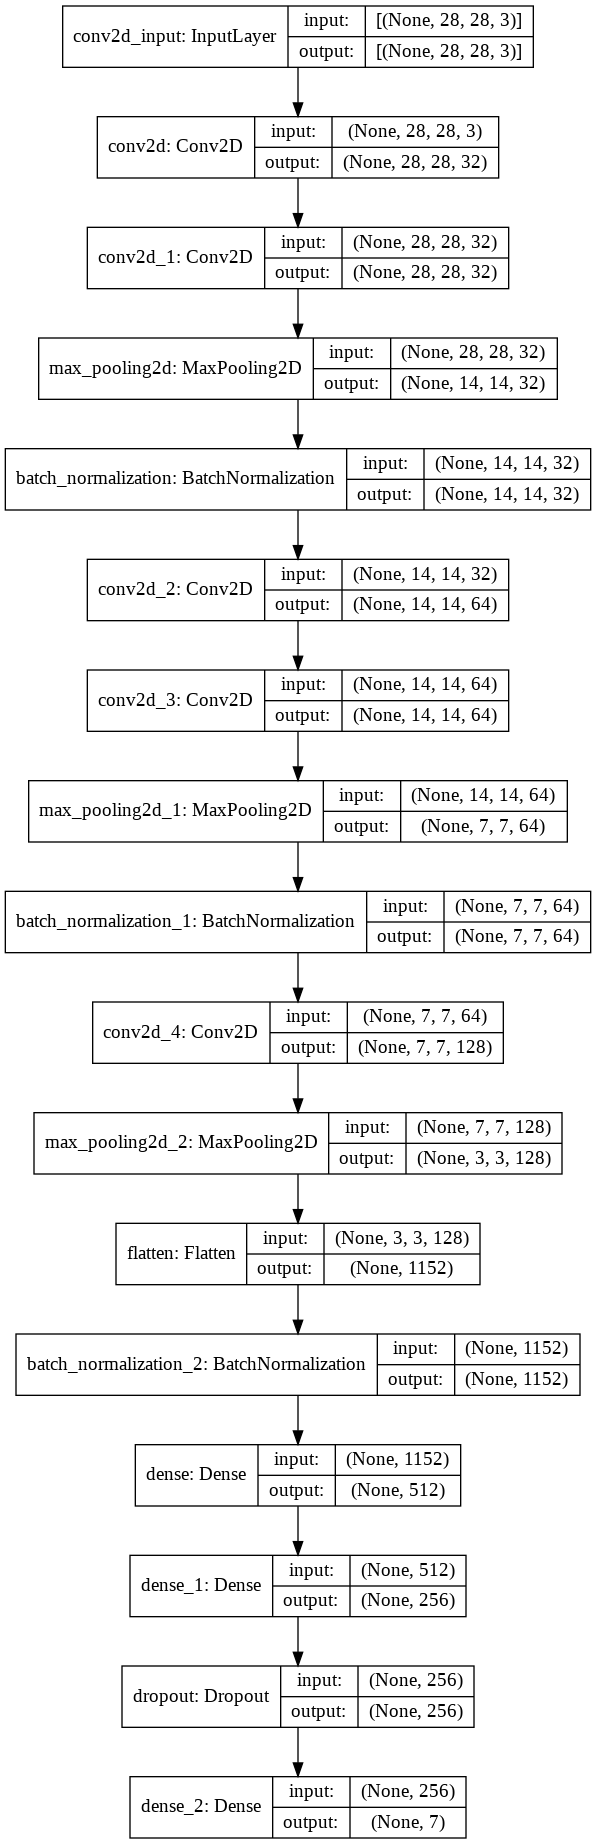

In [ ]:
plot_model(model, to_file='model_sequential.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [ ]:
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer= optimizer, loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
# training = model.fit(x_train, y_train, epochs = 5, batch_size= 128, validation_data=(x_valid, y_valid), shuffle = True)
training = model.fit(x_train, y_train, epochs = 10, validation_data=(x_valid, y_valid),batch_size= 128, shuffle = True)

Epoch 1/10
221/221 [==============================] - 137s 614ms/step - loss: 1.0689 - accuracy: 0.6201 - val_loss: 1.4614 - val_accuracy: 0.4338
Epoch 2/10
221/221 [==============================] - 135s 611ms/step - loss: 0.5329 - accuracy: 0.8228 - val_loss: 0.4664 - val_accuracy: 0.8604
Epoch 3/10
221/221 [==============================] - 135s 610ms/step - loss: 0.3374 - accuracy: 0.8934 - val_loss: 0.2876 - val_accuracy: 0.9201
Epoch 4/10
221/221 [==============================] - 135s 610ms/step - loss: 0.2265 - accuracy: 0.9313 - val_loss: 0.2076 - val_accuracy: 0.9375
Epoch 5/10
221/221 [==============================] - 135s 611ms/step - loss: 0.1591 - accuracy: 0.9537 - val_loss: 0.1866 - val_accuracy: 0.9390
Epoch 6/10
221/221 [==============================] - 135s 611ms/step - loss: 0.1131 - accuracy: 0.9678 - val_loss: 0.1376 - val_accuracy: 0.9615
Epoch 7/10
221/221 [==============================] - 135s 612ms/step - loss: 0.0849 - accuracy: 0.9761 - val_loss: 0.1644 -

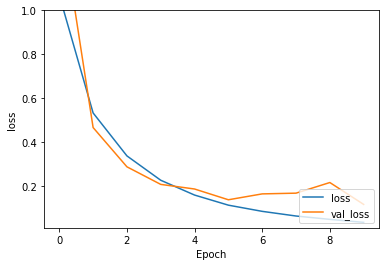

In [ ]:
plt.plot(training.history['loss'], label='loss')
plt.plot(training.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.01, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

294/294 - 10s - loss: 0.1319 - accuracy: 0.9625


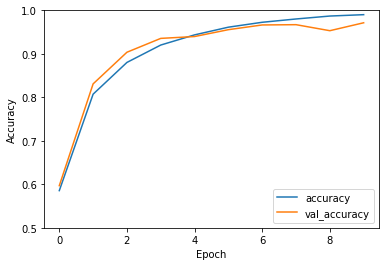

In [ ]:
plt.plot(training.history['accuracy'], label='accuracy')
plt.plot(training.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# img = cv2.imread('gdrive/Shareddrives/FIT3163 - Group 6 Assignment/CNN/ISIC_0032258.jpg')
# img = cv2.resize(img,(28,28))
# img = np.reshape(img,[-1,28,28,3])

In [ ]:
model.save('gdrive/Shareddrives/FIT3163 - Group 6 Assignment/CNN/test20.h5')

In [ ]:
import tensorflow as tf
from tensorflow import keras
import PIL
import numpy as np

In [ ]:
classes = {0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  
           1:('bcc' , ' basal cell carcinoma'), 
           2 :('bkl', 'benign keratosis-like lesions'), 
           3: ('df', 'dermatofibroma'),
           4: ('nv', ' melanocytic nevi'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           6: ('mel', 'melanoma')}

In [ ]:
sequential_model = tf.keras.models.load_model('gdrive/Shareddrives/FIT3163 - Group 6 Assignment/CNN/test20.h5')

In [ ]:
image = PIL.Image.open('gdrive/Shareddrives/FIT3163 - Group 6 Assignment/CNN/ISIC_0032258.jpg')
image = image.convert("RGB")
image = image.resize((28,28))
img = np.array(image).reshape(-1,28,28,3)
result = sequential_model.predict(img)

In [ ]:
max_prob = max(result[0])
class_ind = list(result[0]).index(max_prob)
class_label = classes[class_ind]
max_prob

0.92229986

In [ ]:
print(class_label)

('mel', 'melanoma')


In [ ]:
# save the model

In [ ]:
# model.save('gdrive/Shareddrives/FIT3163 - Group 6 Assignment/CNN/my_model.h5')